In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt


In [12]:

# Load the dataset
data = pd.read_csv('synthesized_data.csv')


In [13]:

# Extract input and output columns
X = data[['Min_Temperature', 'Max_Temperature', 'Min_Rainfall', 'Max_Rainfall', 'Temperature', 'Rainfall']]
y = data['Price']


In [14]:

# Normalize the input features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the output
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))


In [15]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [16]:

# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/home/samarth5854/anaconda3/envs/PsycheSail/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
66/66 - 1s - 22ms/step - loss: 0.1871 - val_loss: 0.1287
Epoch 2/100
66/66 - 0s - 1ms/step - loss: 0.0980 - val_loss: 0.0988
Epoch 3/100
66/66 - 0s - 2ms/step - loss: 0.0852 - val_loss: 0.0866
Epoch 4/100
66/66 - 0s - 2ms/step - loss: 0.0806 - val_loss: 0.0831
Epoch 5/100
66/66 - 0s - 1ms/step - loss: 0.0790 - val_loss: 0.0791
Epoch 6/100
66/66 - 0s - 1ms/step - loss: 0.0777 - val_loss: 0.0774
Epoch 7/100
66/66 - 0s - 2ms/step - loss: 0.0765 - val_loss: 0.0767
Epoch 8/100
66/66 - 0s - 1ms/step - loss: 0.0750 - val_loss: 0.0757
Epoch 9/100
66/66 - 0s - 1ms/step - loss: 0.0744 - val_loss: 0.0755
Epoch 10/100
66/66 - 0s - 2ms/step - loss: 0.0732 - val_loss: 0.0735
Epoch 11/100
66/66 - 0s - 1ms/step - loss: 0.0726 - val_loss: 0.0751
Epoch 12/100
66/66 - 0s - 1ms/step - loss: 0.0708 - val_loss: 0.0717
Epoch 13/100
66/66 - 0s - 1ms/step - loss: 0.0699 - val_loss: 0.0718
Epoch 14/100
66/66 - 0s - 2ms/step - loss: 0.0692 - val_loss: 0.0704
Epoch 15/100
66/66 - 0s - 1ms/step - loss:

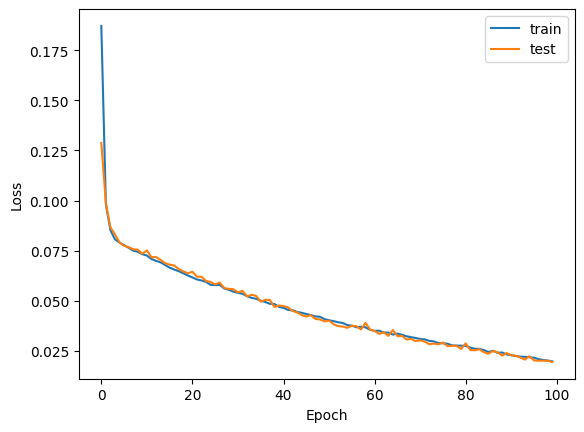

In [18]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:

# Make predictions
y_pred = model.predict(X_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


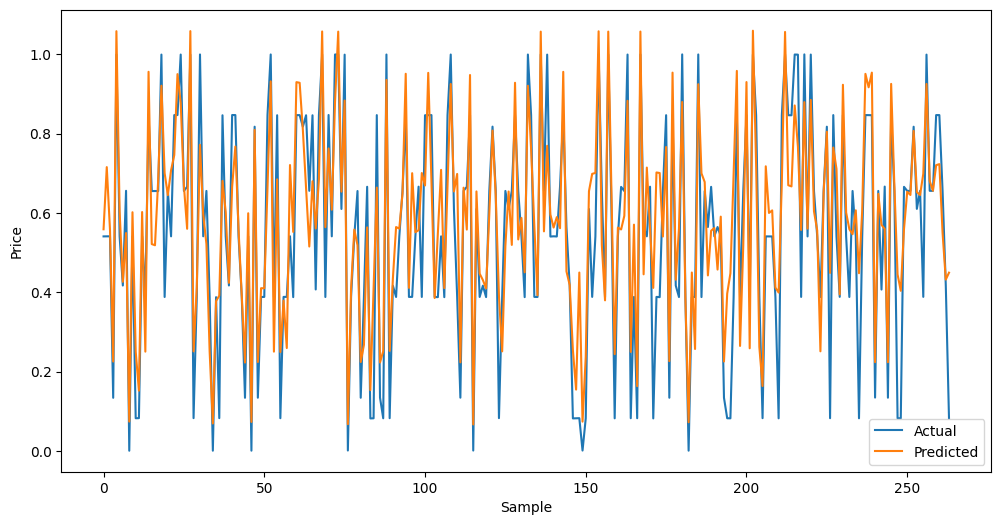

In [21]:
# Plot actual vs predicted prices with stretched aspect ratio
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend()
plt.show()
